<h2>Write a code for correlation of two given DTSs without using inbuilt
function.</h2>

\begin{equation}
    y(n) = x(n) * h(-n) = \sum \limits _{k=-\infty} ^{\infty} x(k) * h(n-k)
\end{equation}

<h3>Given data</h3>

 Discrete time sequences 1 (DTS1): $X_{1}$($n_{1}$) = $\{1, 2, 3, 4\}$,  $n_{1} = -1:2$

 Discrete time sequences 2 (DTS2): $X_{2}$($n_{2}$) = $\{1, 2, 1, 1\}$,  $n_{2} = -2:1$



<p> Before solving it, let me explain my approach. As per the formula, Correlation is same as the convolution of $X(n)$ and $H(-n)$, I will pass these values to our prevously done convolution function.

<h2>Import Modules</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h3>Helper function for plotting</h3>

In [2]:
def plot_graph(sequence, val_range, x_label = None, y_label = None, graph_title = None):
    """
    sequene: To plot
    val_range: Min-max range of the sequence
    x_label, y_label, graph_title: Labelling the plot
    """
    plt.stem(val_range, sequence, use_line_collection= True)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(graph_title)
    plt.show()

<h3>Folding</h3>

In [3]:
def folding(arr, n):
    
    # sanity check for length of timestamp and signal array must be same
    assert len(arr) == len(n)
    
    n = np.array(n)
    index_0 = np.where(n == 0)[0][0]
    
    # initiate an empty array to store our updated array
    new_arr = []
    
    # push all the positive timestamps to our new arr
    # for example in our case
    # [-1, 0, 1, 2] will be [-2, -1, 0, 1] and corresponding array values will be updated accordingly
    
    # push from 2 to 1 in reverse order
    for i in range(len(n) - 1, index_0 - 1, -1):
        new_arr.append(arr[i])
    
    # push from 0 to -1 in the same order
    for j in arr[:index_0][::-1]:
        new_arr.append(j)
    
    # our n is now [2, 1, 0, -1] hence return the negative sorted values i.e [-2, -1, 0, 1] which is our folded timestamp
    return np.array(new_arr), sorted(-n)

<h3>Padding</h3>

In [4]:
def zero_pad(arr, left_pad=0, right_pad=0):
    
    # depending on the consequences, we may need left padding i.e adding zeros on the left
    # or right padding, i.e adding zeros on the right
    # hence we have takes both paddings in the same function
    # this function will return an array as such
    # [left_padded + original_arr + right_padded]
    
    padded_arr = np.append(np.zeros((left_pad, )),
                          np.append(arr, np.zeros(right_pad, )))
    
    return padded_arr

<h3> Calculate the Convolution </h3>

In [5]:
def calculate_convolution(x, h):
    """
    parameters: 
    x -> zero padded signal of len = max_len i.e l1 + l2 - 1
    h -> our folded h(n) signal 
    """
    
    # initiate the matrix as said above
    ans = np.zeros((x.shape[0], x.shape[0]))
    
    # keep stacking the linear kernels which will be later passed on our padded signal
    for i in range(ans.shape[0]):
        if i < len(h):
            ans[i, :i + 1] = h[-i - 1:]
        else:
            ans[i, i - len(h)+1: i+1] = h
    # print to observe
    print('\nStack of linear kernels: \n\n', ans)
    
    # take the transpose
    ans = np.transpose(ans)
    
    # return matrix multiplication of our padded signal and our kernel matrix, this is our desired result
    return np.matmul(x, ans)

<h2>Putting it all together</h2>

In [6]:
def main(x1, n1, x2, n2):
    """
    Calculates the convolution of x1 and x2 where
    x1 -> original signal
    x2 -> filter/kernel
    n1 -> timestamps of x1
    n2 -> timestamps of x2
    """
    # show signal x1
    print("Signal x is: ", x1)
    print("\nTime stamp of X is: ", n1)
    plot_graph(x1, n1, y_label='$x1$', x_label='timestamp', graph_title='Signal $x$')

    # show signal x2
    print("\nSignal H is: ", x2)
    print("\nTimestamp of H is: ", n2)
    plot_graph(x2, n2, y_label='$h(n)$', x_label='timestamp', graph_title='Signal $h$')


    # apply folding on second signal
    folded_H, neg_timestamp = folding(x2, n2)
    print("\nFolded H is: ", folded_H)
    print("\nTimestamp of H is: ", neg_timestamp)
    plot_graph(folded_H, neg_timestamp, x_label='timestamp', y_label='$h(-n)$', graph_title='Folded $h(n)$')

    # create the resutant timestamp
    # take the min of min of timestamps
    left_most_timestamp = min(min(n1), min(neg_timestamp))

    # calculate the maximum sequence length
    max_len_result = len(n1) + len(neg_timestamp) - 1

    # initialize the resultant convolution array with zeroes
    result_time_stamp = np.arange(left_most_timestamp, left_most_timestamp + max_len_result, 1)
    print("\nResultant timestamp would be: ", result_time_stamp)

    # pad our Signal X upto the len of max_len
    # 3 is obtained from result_time_stamp - len(x1)
    X = zero_pad(x1, right_pad=3)

    # Here is our result
    result = calculate_convolution(X, folded_H)
    print('\nConvolution of Signal x1 and x2 is: ', result)

    plot_graph(result, result_time_stamp, x_label='timestamp', y_label='$\sum x(k) * h(n-k)$', graph_title='Convoution Result')

    assert all(np.convolve(x1, x2) == result), 'Computed Result is Wrong'

As our $main$ function calculates the convolution of two signals, use it to calculate the convolution of $X(n)$ and $H(-n)$, which is our desired result i.e correlation of $X(n)$ and $H(-n)$.

In [7]:
def correlation_main(x, n1, h, n2):
    """
    Calculates the corelation of x and h where
        x -> original signal
        h -> filter/kernel
        n1 -> timestamps of x
        n2 -> timestamps of h
    
    steps to follow:
        1. flip our signal H(n) given to get H(-n)
        2. Call our main() function to calculate the convolution of the original signal and the flipped signal
    """
    
    ###################
    # Flip the signal H(n) to get H(-n)
    flipped_h, flipped_n = folding(h, n2)
    
    # call our convolution function that we defined above
    # pass the arguments, x as main signal and flipped_h as kernel
    main(x, n1, flipped_h, flipped_n)
    
    pass

Signal x is:  [1 2 3 4]

Time stamp of X is:  [-1  0  1  2]


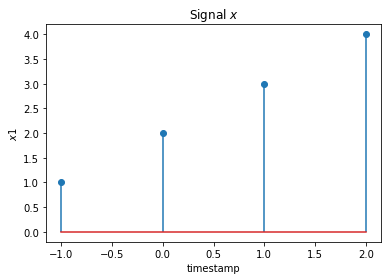


Signal H is:  [1 1 2 1]

Timestamp of H is:  [-1, 0, 1, 2]


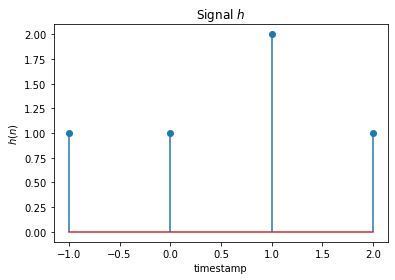


Folded H is:  [1 2 1 1]

Timestamp of H is:  [-2, -1, 0, 1]


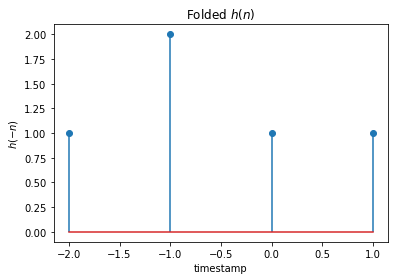


Resultant timestamp would be:  [-2 -1  0  1  2  3  4]

Stack of linear kernels: 

 [[1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0.]
 [2. 1. 1. 0. 0. 0. 0.]
 [1. 2. 1. 1. 0. 0. 0.]
 [0. 1. 2. 1. 1. 0. 0.]
 [0. 0. 1. 2. 1. 1. 0.]
 [0. 0. 0. 1. 2. 1. 1.]]

Convolution of Signal x1 and x2 is:  [ 1.  3.  7. 12. 12. 11.  4.]


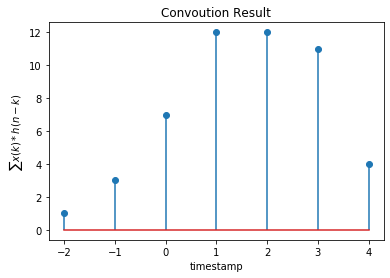

In [8]:
############################
# input DTS 1
x1 = np.array([1, 2, 3, 4])
n1 = np.arange(-1, 3, 1)

############################
# input DTS 2
x2 = np.array([1, 2, 1, 1])
n2 = np.arange(-2, 2, 1)


############################
# call the main function which contains all the implementation
correlation_main(x1, n1, x2, n2)

<h3>Kindly read the comments and docstring of the functions.</h3>

<h4> Submitted by: </h4>

_Name_ : **Mrutyujay Biswal**
_Roll no_ : **118EI0350**